# 实验一：手动实现前馈神经网络
姓名：王恩泰

学号：21114019

# 一. 回归问题

In [1]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.utils.data as Data

## 1. 随机生成数据集

In [2]:
num_train, num_test = 700, 300
dim_w = 100

# 真实参数值
true_w = 2 * torch.ones(dim_w, 1)
true_b = 1

total_x = torch.randn((num_train+num_test, dim_w))
true_total_y = torch.matmul(total_x, true_w)+true_b
rand_total_y = torch.tensor(np.random.normal(0, 0.01, size=true_total_y.size()), dtype=torch.float) # 为生成的label添加随机扰动

train_x = total_x[:num_train, :]
train_y = rand_total_y[:num_train, :]
test_x = total_x[num_train:, :]
test_y = rand_total_y[num_train:, :]

print(train_x.size())
print(train_y.size())
print(test_x.size())
print(test_y.size())

torch.Size([700, 100])
torch.Size([700, 1])
torch.Size([300, 100])
torch.Size([300, 1])


## 2. 定义相关模块函数

In [3]:
# 1. 初始化参数w和b
def init_params():
    w = torch.rand((dim_w, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w,b]

# 2. 计算线性模型
def linear_model(x,w,b):
    z = torch.mm(x,w)+b
    return z

# 3. 损失函数
def loss_func(y_true, y_predict):
    loss = ((y_true - y_predict.view(y_true.size())) ** 2) / 2
    return loss

# 4. 梯度下降
def sgd(params, lr, batch_size):
    for para in params:
        para.data -= lr*para.grad

## 3. 模型训练参数

In [4]:
batch_size = 10
lr = 0.005
max_epochs = 20

train_dataset = Data.TensorDataset(train_x, train_y)
train_iter = Data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)

## 4. 模型训练

iter: 0, train_loss= 0.051214, test_loss= 0.074450
iter: 1, train_loss= 0.000703, test_loss= 0.001189
iter: 2, train_loss= 0.000068, test_loss= 0.000082
iter: 3, train_loss= 0.000053, test_loss= 0.000062
iter: 4, train_loss= 0.000050, test_loss= 0.000062
iter: 5, train_loss= 0.000054, test_loss= 0.000066
iter: 6, train_loss= 0.000054, test_loss= 0.000062
iter: 7, train_loss= 0.000054, test_loss= 0.000057
iter: 8, train_loss= 0.000055, test_loss= 0.000068
iter: 9, train_loss= 0.000052, test_loss= 0.000058
iter: 10, train_loss= 0.000054, test_loss= 0.000061
iter: 11, train_loss= 0.000053, test_loss= 0.000060
iter: 12, train_loss= 0.000055, test_loss= 0.000060
iter: 13, train_loss= 0.000055, test_loss= 0.000065
iter: 14, train_loss= 0.000055, test_loss= 0.000065
iter: 15, train_loss= 0.000054, test_loss= 0.000061
iter: 16, train_loss= 0.000054, test_loss= 0.000070
iter: 17, train_loss= 0.000053, test_loss= 0.000063
iter: 18, train_loss= 0.000056, test_loss= 0.000066
iter: 19, train_loss= 

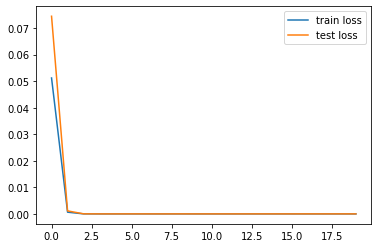

In [5]:
[w,b] = init_params()
train_loss_list = []
test_loss_list = []

for epoch in range(max_epochs):
    for train_x_iter,train_y_iter in train_iter:
        y_predict = linear_model(train_x_iter,w,b)
        # print(y_predict)
        # print(train_y_iter)
        train_loss = loss_func(train_y_iter, y_predict)
        train_loss = train_loss.sum()
        # print(train_loss)

        # 先梯度清零在反向计算？
        if w.grad is not None:
            w.grad.data.zero_()
            b.grad.data.zero_()
        train_loss.backward()
        # 梯度更新
        sgd([w,b],lr,batch_size)
    train_loss_epoch = loss_func(linear_model(train_x,w,b), train_y)
    train_loss_list.append(train_loss_epoch.mean().item())

    test_loss_epoch = loss_func(linear_model(test_x,w,b), test_y)
    test_loss_list.append(float(test_loss_epoch.mean()))

    print('iter: %d, train_loss= %f, test_loss= %f' % (epoch, train_loss_epoch.mean(), test_loss_epoch.mean()))
print('iter: %d, train_loss= %f, test_loss= %f' % (epoch, train_loss_epoch.mean(), test_loss_epoch.mean()))
plt.plot(train_loss_list, label='train loss')
plt.plot(test_loss_list, label='test loss')
plt.legend() 
plt.show()    

# 二、二分类问题

## 1. 随机生成两类数据

In [6]:
n_data = torch.ones(1000, 20) # 1000*20的数据基本形态
x1 = torch.normal(2*n_data,1) # 均值为2，方差为1, 1000*20规格的随机数据（Feature）
y1 = torch.zeros(1000) # 1000个分到0类
x2 = torch.normal(-2*n_data,1) # 均值为-2，方差为1, 1000*20规格的随机数据（Feature）
y2 = torch.ones(1000) # 1000个分到1类

# 合并数据，把所有产生的x,0按行拼接
x_train_data = torch.cat((x1[0:700],x2[0:700]),0).type(torch.FloatTensor)
y_train_data = torch.cat((y1[0:700],y2[0:700]),0).type(torch.FloatTensor)
print(x_train_data.size())
print(y_train_data.size())

x_test_data = torch.cat((x1[700:1000],x2[700:1000]),0).type(torch.FloatTensor)
y_test_data = torch.cat((y1[700:1000],y2[700:1000]),0).type(torch.FloatTensor)
print(x_test_data.size())
print(y_test_data.size())

train_dataset = Data.TensorDataset(x_train_data, y_train_data)
test_dataset = Data.TensorDataset(x_test_data, y_test_data)
train_iter = Data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_iter = Data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=True)

torch.Size([1400, 20])
torch.Size([1400])
torch.Size([600, 20])
torch.Size([600])


## 2. 定义相关模块函数

In [7]:
# 1. 初始化参数w和b
num_inputs, num_outputs, num_hiddens = 20, 1, 50 # 输入层=feature数量，输出层=1，隐藏层
w1 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_inputs)), dtype=torch.float)
b1 = torch.zeros(num_hiddens, dtype=torch.float)
w2 = torch.tensor(np.random.normal(0, 0.01, (num_outputs, num_hiddens)), dtype=torch.float)
b2 = torch.ones(num_outputs, dtype=torch.float)
params = [w1, b1, w2, b2]
for para in params:
    para.requires_grad_(requires_grad=True)

# 2. 定义Relu激活函数
def relu(x):
    return torch.max(input=x, other=torch.tensor(0.0))

# 3. 定义模型
def net(X):
    X = X.view((-1, num_inputs))
    H = relu(torch.matmul(X, w1.t()) + b1)
    return torch.matmul(H, w2.t()) + b2

# 4. 交叉熵损失函数
def loss_func(y_true, y_predict):
    loss = ((y_true - y_predict.view(y_true.size())) ** 2) / 2
    return loss

# 5. 定义随机梯度下降
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size # 为什么要除上batch_size?

## 3. 构建训练模型

iter: 0, train_loss= 0.015506, test_loss= 0.002458
iter: 0, train_acc= 0.965714, test_acc= 1.000000
iter: 10, train_loss= 0.001583, test_loss= 0.001800
iter: 10, train_acc= 1.000000, test_acc= 1.000000
iter: 20, train_loss= 0.001347, test_loss= 0.001605
iter: 20, train_acc= 1.000000, test_acc= 1.000000
iter: 30, train_loss= 0.001223, test_loss= 0.001416
iter: 30, train_acc= 1.000000, test_acc= 1.000000
iter: 40, train_loss= 0.001128, test_loss= 0.001310
iter: 40, train_acc= 1.000000, test_acc= 1.000000
iter: 50, train_loss= 0.001008, test_loss= 0.001237
iter: 50, train_acc= 1.000000, test_acc= 1.000000
iter: 60, train_loss= 0.000915, test_loss= 0.001051
iter: 60, train_acc= 1.000000, test_acc= 1.000000
iter: 70, train_loss= 0.000811, test_loss= 0.000971
iter: 70, train_acc= 1.000000, test_acc= 1.000000
iter: 80, train_loss= 0.000746, test_loss= 0.000877
iter: 80, train_acc= 1.000000, test_acc= 1.000000
iter: 90, train_loss= 0.000688, test_loss= 0.000864
iter: 90, train_acc= 1.000000, t

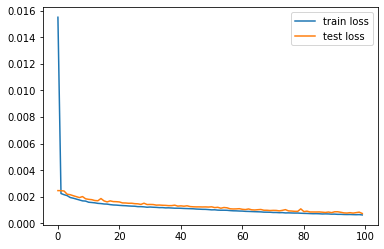

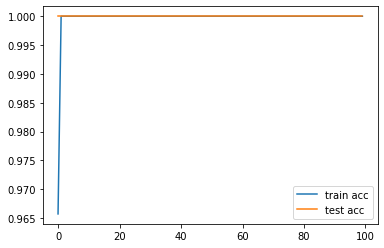

In [8]:
num_epochs = 100
lr = 0.05
batch_size = 10
optimizer = None
train_loss_list = []
test_loss_list = []
train_acc_list = []
test_acc_list = []

for epoch in range(num_epochs):
    train_loss_sum = 0
    train_acc_sum = 0
    n_train = 0
    for x_train, y_train in train_iter:
        y_hat = net(x_train)
        # print(y_train)
        # print(y_hat.squeeze(-1))
        l = loss_func(y_hat, y_train).sum()
        if optimizer is not None:
            optimizer.zero_grad()
        elif params is not None and params[0].grad is not None:
            for param in params:
                param.grad.data.zero_()
        l.backward()
        if optimizer is None:
            sgd(params, lr, batch_size)
        else:
            optimizer.step()
        train_loss_sum += l.item()
        n_train += y_hat.shape[0]
        train_acc_sum += (y_hat.ge(0.5).float().squeeze() == y_train).sum().item()

    train_loss_list.append(train_loss_sum/n_train)
    train_acc_list.append(train_acc_sum/n_train)

    # for test loss value
    test_loss_sum = 0
    test_acc_sum = 0
    n_test = 0
    for x_test,y_test in test_iter:
        y_hat = net(x_test)
        l = loss_func(y_hat, y_test).sum()
        test_loss_sum += l.item()
        n_test += y_hat.shape[0]
        test_acc_sum += (y_hat.ge(0.5).float().squeeze() == y_test).sum().item()

    test_loss_list.append(test_loss_sum/n_test)
    test_acc_list.append(test_acc_sum/n_test)
    if (epoch % 10 == 0):
        print('iter: %d, train_loss= %f, test_loss= %f' % (epoch, train_loss_sum/n_train, test_loss_sum/n_test)) 
        print('iter: %d, train_acc= %f, test_acc= %f' % (epoch, train_acc_sum/n_train, test_acc_sum/n_test)) 
print('iter: %d, train_loss= %f, test_loss= %f' % (epoch, train_loss_sum/n_train, test_loss_sum/n_test)) 
print('iter: %d, train_acc= %f, test_acc= %f' % (epoch, train_acc_sum/n_train, test_acc_sum/n_test))    
plt.plot(train_loss_list, label='train loss')
plt.plot(test_loss_list, label='test loss')
plt.legend() 
plt.show()     
plt.plot(train_acc_list, label='train acc')
plt.plot(test_acc_list, label='test acc')
plt.legend() 
plt.show()     

# 三、多分类问题

## 1. 读取数据集

In [9]:
# 训练集
mnist_train = torchvision.datasets.FashionMNIST(root='./Datasets', train=True,
                                                download=False, transform=transforms.ToTensor())
# 测试集
mnist_test = torchvision.datasets.FashionMNIST(root='./Datasets', train=False,
                                                download=False, transform=transforms.ToTensor())

# 通过DataLoader读取小批量数据样本
batch_size = 256
num_workers = 0
train_data = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True,
num_workers=num_workers)
test_data = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False,
num_workers=num_workers)

## 2. 定义相关函数模块

In [10]:
# 1. 初始化模型参数
num_inputs, num_outputs, num_hiddens = 784, 10, 256
w1 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_inputs)), dtype=torch.float)
b1 = torch.zeros(num_hiddens, dtype=torch.float)
w2 = torch.tensor(np.random.normal(0, 0.01, (num_outputs, num_hiddens)), dtype=torch.float)
b2 = torch.ones(num_outputs, dtype=torch.float)

params = [w1, b1, w2, b2]
for param in params:
    param.requires_grad_(requires_grad=True)

# 2. 定义激活函数
def relu(X):
    return torch.max(input=X, other=torch.tensor(0.0))

# 3. 定义网络
def net(X):
    X = X.view((-1, num_inputs))
    H = relu(torch.matmul(X, w1.t()) + b1)
    return torch.matmul(H, w2.t()) + b2

# 4. 交叉熵损失函数（不能用平方误差）
# def loss_func(y_true, y_predict):
#     loss = ((y_true - y_predict.view(y_true.size())) ** 2) / 2
#     return loss
loss = torch.nn.CrossEntropyLoss()

# 5.梯度下降
def sgd(params, lr):
    for param in params:
        param.data -= lr * param.grad 

## 3. 构建训练模型

iter: 0, train_loss= 0.004076, test_loss= 0.003051
iter: 0, train_acc= 0.639917, test_acc= 0.721400
iter: 10, train_loss= 0.001474, test_loss= 0.001643
iter: 10, train_acc= 0.866567, test_acc= 0.852800
iter: 20, train_loss= 0.001243, test_loss= 0.001446
iter: 20, train_acc= 0.886333, test_acc= 0.870000
iter: 30, train_loss= 0.001100, test_loss= 0.001419
iter: 30, train_acc= 0.899600, test_acc= 0.871000
iter: 40, train_loss= 0.000999, test_loss= 0.001353
iter: 40, train_acc= 0.908250, test_acc= 0.876700
iter: 49, train_loss= 0.000929, test_loss= 0.001331
iter: 49, train_acc= 0.915500, test_acc= 0.879800


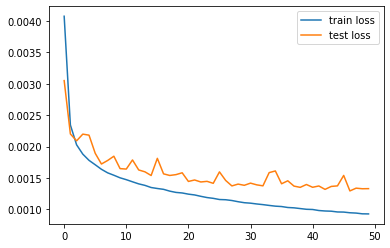

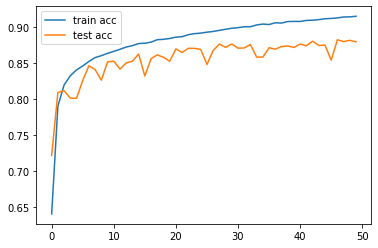

In [11]:
num_epochs = 50
lr = 0.1
# batch_size = 10
optimizer = None
train_loss_list = []
test_loss_list = []
train_acc_list = []
test_acc_list = []

for epoch in range(num_epochs):
    train_loss_sum = 0
    train_acc_sum = 0
    train_n = 0
    for x_train, y_train in train_data:
        y_hat = net(x_train)
        # y_hat = y_hat.argmax(dim=1) # 找最大概率那个,使用交叉熵不需要
        # print(y_train)
        # print(y_hat)
        l = loss(y_hat, y_train).sum()
        if optimizer is not None:
            optimizer.zero_grad()
        elif params is not None and params[0].grad is not None:
            for param in params:
                param.grad.data.zero_()
        # l.requires_grad_(True) 
        l.backward()
        if optimizer is None:
            sgd(params, lr)
        else:
            optimizer.step()
        train_loss_sum += l.item()
        train_n += y_hat.shape[0]
        train_acc_sum += (y_hat.argmax(dim=1) == y_train).sum().item()
    train_loss_list.append(train_loss_sum/train_n)
    train_acc_list.append(train_acc_sum/train_n)

    # for test loss value
    test_loss_sum = 0
    test_n = 0
    test_acc_sum = 0
    for x_test,y_test in test_data:
        y_hat = net(x_test)
        l = loss(y_hat, y_test).sum()
        test_loss_sum += l.item()
        test_n += y_hat.shape[0]
        test_acc_sum += (y_hat.argmax(dim=1) == y_test).sum().item()
    test_loss_list.append(test_loss_sum/test_n)
    test_acc_list.append(test_acc_sum/test_n)
    if (epoch % 10 == 0):
        print('iter: %d, train_loss= %f, test_loss= %f' % (epoch, train_loss_sum/train_n, test_loss_sum/test_n))
        print('iter: %d, train_acc= %f, test_acc= %f' % (epoch, train_acc_sum/train_n, test_acc_sum/test_n))
print('iter: %d, train_loss= %f, test_loss= %f' % (epoch, train_loss_sum/train_n, test_loss_sum/test_n))
print('iter: %d, train_acc= %f, test_acc= %f' % (epoch, train_acc_sum/train_n, test_acc_sum/test_n))   
plt.plot(train_loss_list, label='train loss')
plt.plot(test_loss_list, label='test loss')
plt.legend() 
plt.show()
plt.plot(train_acc_list, label='train acc')
plt.plot(test_acc_list, label='test acc')
plt.legend() 
plt.show()